In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('C:/Users/Vishal/Desktop/LU aiml/Data/Linear Regression.xlsx')
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
data.shape

(21613, 5)

# Linear regression model of price vs square feet

In [4]:
linsq=data.drop(['bedrooms','bathrooms','floors'],axis=1)
linsq.head()

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680


In [5]:
linsq.isnull().sum()

price          0
sqft_living    0
dtype: int64

In [6]:
linsq.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


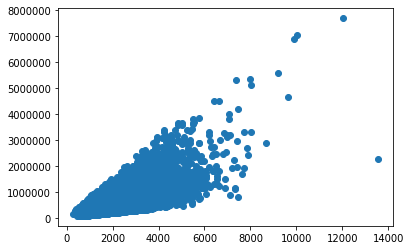

In [7]:
plt.scatter(linsq['sqft_living'],linsq['price'])

In [8]:
x=linsq.iloc[:,-1:]
y=linsq.iloc[:,:1]

# Split the record for training and testing

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Model building

In [25]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [26]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
linreg.coef_

array([[280.61933137]])

In [28]:
linreg.intercept_

array([-44048.95106285])

__Equation is:__

__price = -44048.95106285 + 280.61933137 *(sqft_living)__

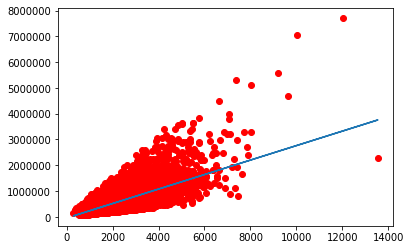

In [29]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train,linreg.predict(x_train))
plt.show()

# Test the model

In [33]:
ypred=linreg.predict(x_test)
ypred

array([[677142.73056709],
       [865157.68258734],
       [253407.54019308],
       ...,
       [511577.32505671],
       [463872.03872322],
       [287081.8599579 ]])

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_test, ypred))

0.4808474481249938


In [35]:
mean_squared_error(y_test,ypred)

68819127839.65007

# INFERENCE:

R-square value is 0.481 means there is 48.1% variance in the target variable.

Totat Error in the model is 68819127839.65007